In [1]:
import os

In [2]:
import pandas as pd                       # For data handling
import matplotlib.pyplot as plt           # For plotting graphs
import seaborn as sns                     # For prettier visualizations
from sklearn.linear_model import LinearRegression  # To build the model
from sklearn.model_selection import train_test_split  # To split training and testing data

In [3]:
sales_data = pd.read_csv('Data.csv')
sales_data.head()  # Shows the first 5 rows

,Date,Product,Quantity,Revenue
0,2023-01-01,Product C,10,2000
1,2023-01-02,Product A,19,2850
2,2023-01-03,Product C,58,11600
3,2023-01-04,Product C,96,19200
4,2023-01-05,Product A,1,150


In [4]:
# Convert date column to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Group by date and get total revenue per day
daily_sales = sales_data.groupby('Date')['Revenue'].sum().reset_index()

# Create a 'Day' column that counts number of days from the start date
daily_sales['Day'] = (daily_sales['Date'] - daily_sales['Date'].min()).dt.days

In [5]:
X = daily_sales[['Day']]       # Feature (independent variable)
y = daily_sales['Revenue']     # Label (dependent variable)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()     # Create model
model.fit(X_train, y_train)    # Train it using training data

LinearRegression()

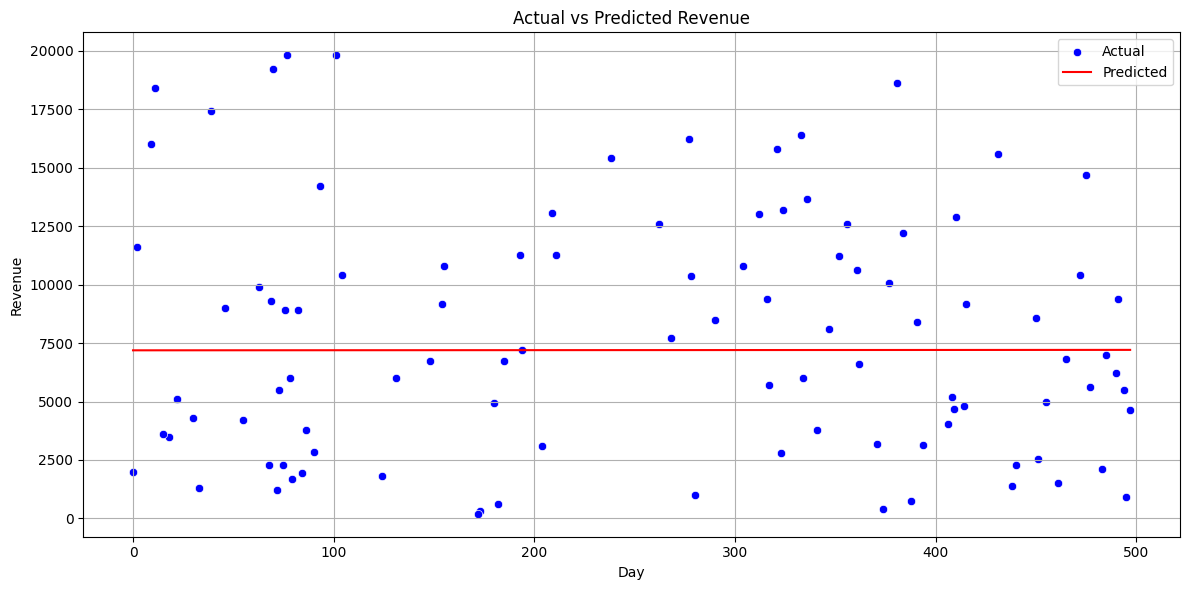

In [8]:
y_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_test['Day'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test['Day'], y=y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Revenue')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Create future days (e.g., next 30)
last_day = daily_sales['Day'].max()
future_days = pd.DataFrame({'Day': range(last_day + 1, last_day + 31)})

# Predict revenue
future_predictions = model.predict(future_days)

# Format as a table
forecast_df = pd.DataFrame({
    'Day': future_days['Day'],
    'Predicted Revenue': future_predictions
})
forecast_df['Date'] = daily_sales['Date'].min() + pd.to_timedelta(forecast_df['Day'], unit='D')
forecast_df = forecast_df[['Date', 'Predicted Revenue']]

# Display
forecast_df.head(10)

,Date,Predicted Revenue
0,2024-05-15,7206.462755
1,2024-05-16,7206.500310
2,2024-05-17,7206.537865
3,2024-05-18,7206.575420
4,2024-05-19,7206.612974
5,2024-05-20,7206.650529
6,2024-05-21,7206.688084
7,2024-05-22,7206.725638
8,2024-05-23,7206.763193
9,2024-05-24,7206.800748
